# 17 Histogram

In [2]:
# import libraries

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# load data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# clean data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
# only get data analyst jobs in the US

df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

<Axes: ylabel='Frequency'>

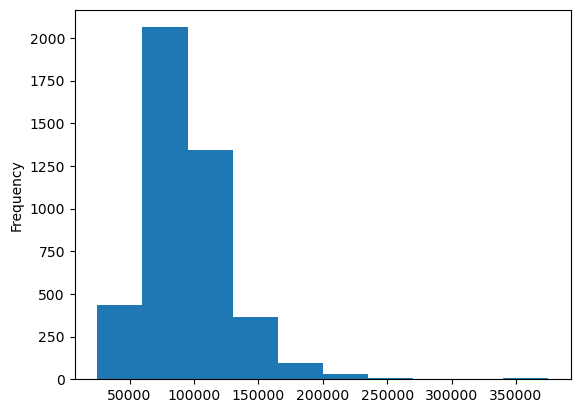

In [ ]:
# then we input a column of the df and use the plot method

df_DA_US["salary_year_avg"].plot(kind="hist")

# we can finesse this further
## the width of the "bins", etc.

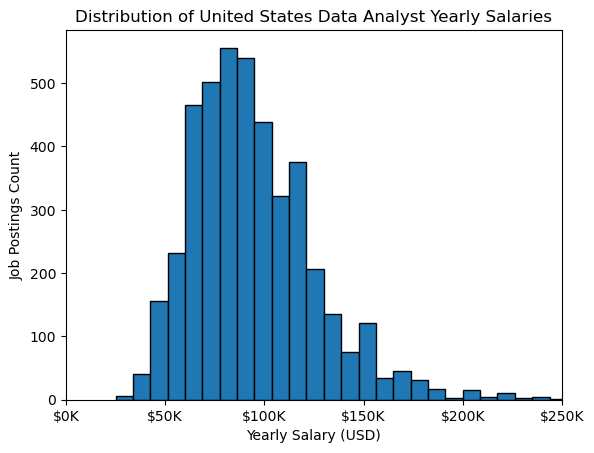

In [15]:
# updated histogram with updated visual. We can also "cut" a tail if very long like the one above with long tail to the right
df_DA_US["salary_year_avg"].plot(kind="hist", bins=40, edgecolor="black")
plt.xlim(0, 250000)

# changing units of the x axis + titles
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.title("Distribution of United States Data Analyst Yearly Salaries")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("Job Postings Count")
plt.show()

# 17 Problems

## 2.17.1

Create a histogram to show the distribution of hourly salaries (use salary_hour_avg column) for Data Scientist job postings:

- Create a new DataFrame called df_DS to filter out 'Data Scientist' jobs.
- Customize the plot by setting the number of bins to 40 and the bar color to blue.
- Label the x-axis as 'Hourly Salary' and the y-axis as 'Number of Jobs'.

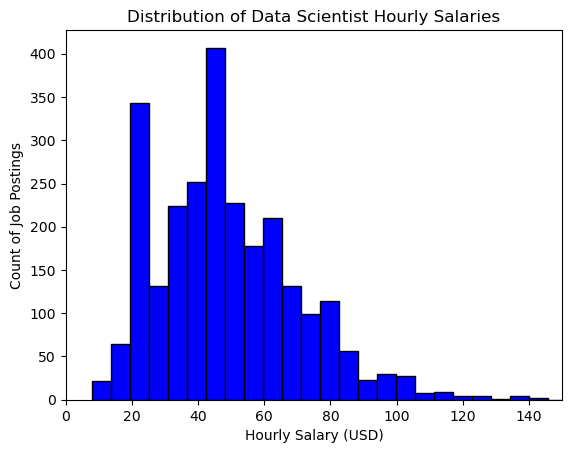

<Figure size 640x480 with 0 Axes>

In [23]:
# create df

df_DS = df[df["job_title_short"] == "Data Scientist"].copy()

# create + customise the histogram

df_DS["salary_hour_avg"].plot(
    kind="hist",
    bins=40,
    color="blue",
    edgecolor="black"
)
plt.xlim(0, 150)

# title, axes, layout
plt.title("Distribution of Data Scientist Hourly Salaries")
plt.xlabel("Hourly Salary (USD)")
plt.ylabel("Count of Job Postings")
plt.show()
plt.tight_layout()

## 2.17.2

Create a histogram to show the distribution of job postings by the number of skills listed using the job_skills column:

- Create a new DataFrame called df_skills to filter out job postings with non-null job_skills.
- Customize the plot by setting the number of bins to 55, the bar color to 'magenta'
- Add a title 'Distribution of Job Postings by Number of Skills Listed'.
- Label the x-axis as 'Number of Skills' and the y-axis as 'Number of Job Postings'.

<function matplotlib.pyplot.show(close=None, block=None)>

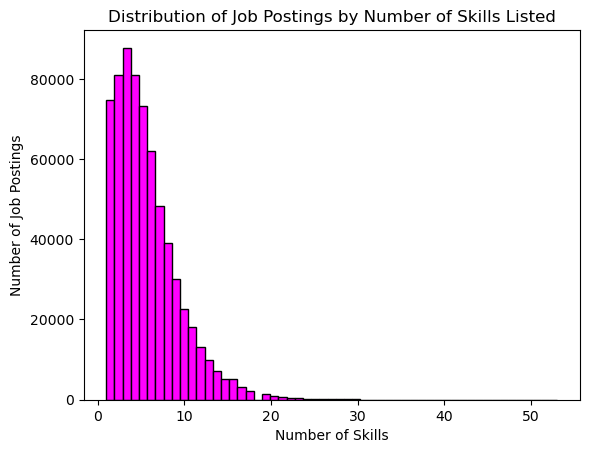

In [38]:
# create a new df that removes the roles without skills, then a unique column to group by, then exploding the skills column

df_skills = df.dropna(subset=["job_skills"]).copy()
df_skills['num_skills'] = df_skills['job_skills'].apply(len)

# plot the graph
df_skills["num_skills"].plot(
    kind="hist",
    bins=55,
    color="magenta",
    edgecolor="black"
)

plt.title("Distribution of Job Postings by Number of Skills Listed")
plt.xlabel("Number of Skills")
plt.ylabel("Number of Job Postings")
plt.show

## 2.17.3

Create a histogram to show the distribution of average yearly salaries (salary_year_avg) for Data Engineer job postings:

- Create a new DataFrame called df_DE to filter out 'Data Engineer' jobs.
- Customize the plot by setting the number of bins to 50, the bar color to red
- Add annotations for the mean and median salaries, using plt.axvline(); for the parameters specify:
    - color: 'blue'/'green'
    - linestyle: 'dashed'
    - label: e.g., f'Mean: ${mean_salary:,.0f}'
- Label the x-axis as 'Yearly Salary' and the y-axis as 'Number of Jobs'.

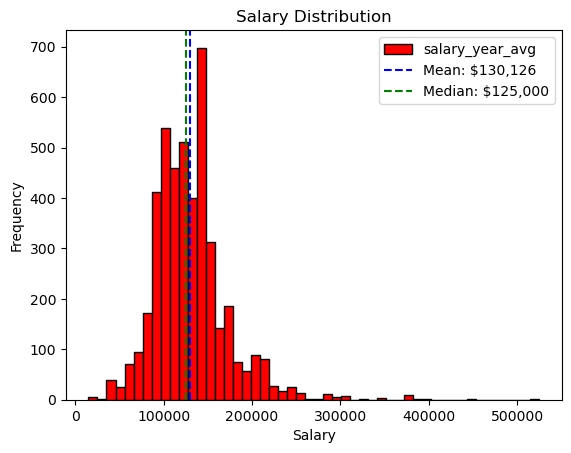

In [45]:
# create df

df_DE = df[df["job_title_short"] == "Data Engineer"].copy()

# remove rows without salary information
df_DE = df_DE.dropna(subset=["salary_year_avg"])

# calculate mean and median salaries
mean_salary = df_DE["salary_year_avg"].mean()
median_salary = df_DE["salary_year_avg"].median()

# plot and customise

df_DE["salary_year_avg"].plot(
    kind="hist",
    bins=50,
    color="red",
    edgecolor="black"
)

# Add annotations for mean and median
plt.axvline(mean_salary, color='blue', linestyle='dashed', label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='dashed', label=f'Median: ${median_salary:,.0f}')

# Add labels, legend, and title
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.legend()

# Show the plot
plt.show()